# Recognise Emotional Expression on Faces

Exercise in recognising emotions in photograhs of people's faces using [fastai](http://www.fast.ai/) library and course (p1 v3 lession 1)

Using the [KDEF](http://www.emotionlab.se/kdef/) dataset and Resnet50, I was able to get an error rate of 6%.

There are 4900 photos of 70 models enacting 6 emotions (fear, anger, disgust, happiness, sadness, surprise) and a neautral expression.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *
from pathlib import Path
import os

In [8]:
data_dir = Path("/storage/data/KDEF/")
src_data_dir = data_dir/"KDEF_and_AKDEF"
flat_dir = data_dir/"flat"
!mkdir -p {flat_dir}

In [12]:
#!pip install wget // wget did not work.

  Running setup.py bdist_wheel for wget ... done
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


Get dataset from http://www.emotionlab.se/kdef/

Download http://kdef.se/download/KDEF_and_AKDEF.zip

__NOTE__: Because this is a zip file, we can't use untar_data(). The following code downloads the data and unzips it.

In [15]:
zip_url = 'http://kdef.se/download/KDEF_and_AKDEF.zip'
zip_file = data_dir/"kdef.zip"
if not src_data_dir.exists():
    !unzip {zip_file} -d {data_dir}

Archive:  /storage/data/KDEF/flat/kdef.zip
   creating: /storage/data/KDEF/KDEF_and_AKDEF/AKDEF/
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/AKDEF/FAFFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/AKDEF/FAFFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/AKDEF/FAFHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/AKDEF/FAFS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/AKDEF/FAHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/AKDEF/FANFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/AKDEF/FANFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/AKDEF/FANHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/AKDEF/FANHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/AKDEF/FANS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/AKDEF/FDIFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/AKDEF/FDIFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/AKDEF/FDIHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/AKDEF/FDIHR.JP

  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF02/AF02DIFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF02/AF02DIHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF02/AF02DIHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF02/AF02DIS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF02/AF02HAFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF02/AF02HAFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF02/AF02HAHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF02/AF02HAHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF02/AF02HAS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF02/AF02NEFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF02/AF02NEFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF02/AF02NEHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF02/AF02NEHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF02/AF02NES.J

  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF05/AF05HAHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF05/AF05HAHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF05/AF05HAS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF05/AF05NEFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF05/AF05NEFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF05/AF05NEHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF05/AF05NEHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF05/AF05NES.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF05/AF05SAFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF05/AF05SAFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF05/AF05SAHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF05/AF05SAHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF05/AF05SAS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF05/AF05SUFL.J

  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF08/AF08NEHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF08/AF08NES.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF08/AF08SAFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF08/AF08SAFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF08/AF08SAHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF08/AF08SAHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF08/AF08SAS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF08/AF08SUFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF08/AF08SUFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF08/AF08SUHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF08/AF08SUHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF08/AF08SUS.JPG  
   creating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF09/
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF09/AF09AFFL.JPG  
  inflati

  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF11/AF11SUFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF11/AF11SUFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF11/AF11SUHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF11/AF11SUHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF11/AF11SUS.JPG  
   creating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF12/
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF12/AF12AFFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF12/AF12AFFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF12/AF12AFHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF12/AF12AFHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF12/AF12AFS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF12/AF12ANFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF12/AF12ANFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF12/AF12ANHL.JPG  
  inflat

  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF15/AF15AFFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF15/AF15AFHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF15/AF15AFHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF15/AF15AFS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF15/AF15ANFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF15/AF15ANFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF15/AF15ANHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF15/AF15ANHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF15/AF15ANS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF15/AF15DIFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF15/AF15DIFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF15/AF15DIHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF15/AF15DIHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF15/AF15DIS.J

  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF18/AF18ANS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF18/AF18DIFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF18/AF18DIFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF18/AF18DIHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF18/AF18DIHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF18/AF18DIS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF18/AF18HAFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF18/AF18HAFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF18/AF18HAHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF18/AF18HAHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF18/AF18HAS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF18/AF18NEFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF18/AF18NEFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF18/AF18NEHL.J

  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF21/AF21HAFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF21/AF21HAHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF21/AF21HAHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF21/AF21HAS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF21/AF21NEFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF21/AF21NEFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF21/AF21NEHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF21/AF21NEHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF21/AF21NES.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF21/AF21SAFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF21/AF21SAFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF21/AF21SAHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF21/AF21SAHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF21/AF21SAS.J

  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF24/AF24NEHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF24/AF24NES.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF24/AF24SAFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF24/AF24SAFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF24/AF24SAHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF24/AF24SAHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF24/AF24SAS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF24/AF24SUFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF24/AF24SUFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF24/AF24SUHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF24/AF24SUHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF24/AF24SUS.JPG  
   creating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF25/
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF25/AF25AFFL.JPG  
  inflati

  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF27/AF27SAS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF27/AF27SUFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF27/AF27SUFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF27/AF27SUHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF27/AF27SUHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF27/AF27SUS.JPG  
   creating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF28/
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF28/AF28AFFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF28/AF28AFFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF28/AF28AFHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF28/AF28AFHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF28/AF28AFS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF28/AF28ANFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF28/AF28ANFR.JPG  
  inflati

  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF31/AF31AFFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF31/AF31AFFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF31/AF31AFHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF31/AF31AFHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF31/AF31AFS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF31/AF31ANFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF31/AF31ANFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF31/AF31ANHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF31/AF31ANHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF31/AF31ANS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF31/AF31DIFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF31/AF31DIFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF31/AF31DIHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF31/AF31DIHR.

  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF34/AF34ANHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF34/AF34ANS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF34/AF34DIFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF34/AF34DIFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF34/AF34DIHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF34/AF34DIHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF34/AF34DIS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF34/AF34HAFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF34/AF34HAFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF34/AF34HAHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF34/AF34HAHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF34/AF34HAS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF34/AF34NEFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AF34/AF34NEFR.J

  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM02/AM02HAFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM02/AM02HAHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM02/AM02HAHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM02/AM02HAS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM02/AM02NEFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM02/AM02NEFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM02/AM02NEHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM02/AM02NEHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM02/AM02NES.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM02/AM02SAFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM02/AM02SAFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM02/AM02SAHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM02/AM02SAHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM02/AM02SAS.J

  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM05/AM05NES.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM05/AM05SAFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM05/AM05SAFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM05/AM05SAHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM05/AM05SAHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM05/AM05SAS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM05/AM05SUFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM05/AM05SUFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM05/AM05SUHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM05/AM05SUHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM05/AM05SUS.JPG  
   creating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM06/
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM06/AM06AFFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM06/AM06AFFR.JPG  
  inflati

  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM08/AM08SUFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM08/AM08SUFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM08/AM08SUHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM08/AM08SUHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM08/AM08SUS.JPG  
   creating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM09/
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM09/AM09AFFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM09/AM09AFFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM09/AM09AFHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM09/AM09AFHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM09/AM09AFS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM09/AM09ANFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM09/AM09ANFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM09/AM09ANHL.JPG  
  inflat

  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM12/AM12AFFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM12/AM12AFHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM12/AM12AFHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM12/AM12AFS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM12/AM12ANFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM12/AM12ANFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM12/AM12ANHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM12/AM12ANHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM12/AM12ANS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM12/AM12DIFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM12/AM12DIFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM12/AM12DIHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM12/AM12DIHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM12/AM12DIS.J

  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM15/AM15ANHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM15/AM15ANS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM15/AM15DIFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM15/AM15DIFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM15/AM15DIHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM15/AM15DIHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM15/AM15DIS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM15/AM15HAFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM15/AM15HAFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM15/AM15HAHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM15/AM15HAHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM15/AM15HAS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM15/AM15NEFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM15/AM15NEFR.J

  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM18/AM18DIS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM18/AM18HAFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM18/AM18HAFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM18/AM18HAHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM18/AM18HAHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM18/AM18HAS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM18/AM18NEFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM18/AM18NEFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM18/AM18NEHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM18/AM18NEHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM18/AM18NES.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM18/AM18SAFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM18/AM18SAFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM18/AM18SAHL.J

  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM21/AM21NEFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM21/AM21NEHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM21/AM21NEHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM21/AM21NES.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM21/AM21SAFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM21/AM21SAFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM21/AM21SAHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM21/AM21SAHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM21/AM21SAS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM21/AM21SUFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM21/AM21SUFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM21/AM21SUHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM21/AM21SUHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM21/AM21SUS.J

  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM24/AM24SAS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM24/AM24SUFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM24/AM24SUFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM24/AM24SUHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM24/AM24SUHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM24/AM24SUS.JPG  
   creating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM25/
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM25/AM25AFFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM25/AM25AFFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM25/AM25AFHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM25/AM25AFHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM25/AM25AFS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM25/AM25ANFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM25/AM25ANFR.JPG  
  inflati

  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM28/AM28AFFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM28/AM28AFFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM28/AM28AFHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM28/AM28AFHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM28/AM28AFS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM28/AM28ANFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM28/AM28ANFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM28/AM28ANHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM28/AM28ANHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM28/AM28ANS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM28/AM28DIFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM28/AM28DIFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM28/AM28DIHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM28/AM28DIHR.

  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM31/AM31ANHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM31/AM31ANS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM31/AM31DIFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM31/AM31DIFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM31/AM31DIHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM31/AM31DIHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM31/AM31DIS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM31/AM31H.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM31/AM31HAFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM31/AM31HAFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM31/AM31HAHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM31/AM31HAHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM31/AM31HAS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM31/AM31NEFL.JPG 

  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM34/AM34DIS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM34/AM34HAFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM34/AM34HAFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM34/AM34HAHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM34/AM34HAHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM34/AM34HAS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM34/AM34NEFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM34/AM34NEFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM34/AM34NEHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM34/AM34NEHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM34/AM34NES.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM34/AM34SAFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM34/AM34SAFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/AM34/AM34SAHL.J

  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF02/BF02NEFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF02/BF02NEHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF02/BF02NEHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF02/BF02NES.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF02/BF02SAFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF02/BF02SAFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF02/BF02SAHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF02/BF02SAHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF02/BF02SAS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF02/BF02SUFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF02/BF02SUFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF02/BF02SUHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF02/BF02SUHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF02/BF02SUS.J

  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF05/BF05SAS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF05/BF05SUFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF05/BF05SUFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF05/BF05SUHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF05/BF05SUHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF05/BF05SUS.JPG  
   creating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF06/
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF06/BF06AFFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF06/BF06AFFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF06/BF06AFHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF06/BF06AFHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF06/BF06AFS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF06/BF06ANFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF06/BF06ANFR.JPG  
  inflati

  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF09/BF09AFHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF09/BF09AFHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF09/BF09AFS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF09/BF09ANFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF09/BF09ANFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF09/BF09ANHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF09/BF09ANHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF09/BF09ANS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF09/BF09DIFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF09/BF09DIFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF09/BF09DIHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF09/BF09DIHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF09/BF09DIS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF09/BF09HAFL.J

  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF12/BF12ANS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF12/BF12DIFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF12/BF12DIFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF12/BF12DIHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF12/BF12DIHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF12/BF12DIS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF12/BF12HAFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF12/BF12HAFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF12/BF12HAHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF12/BF12HAHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF12/BF12HAS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF12/BF12NEFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF12/BF12NEFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF12/BF12NEHL.J

  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF15/BF15HAHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF15/BF15HAHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF15/BF15HAS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF15/BF15NEFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF15/BF15NEFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF15/BF15NEHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF15/BF15NEHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF15/BF15NES.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF15/BF15SAFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF15/BF15SAFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF15/BF15SAHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF15/BF15SAHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF15/BF15SAS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF15/BF15SUFL.J

  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF18/BF18NES.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF18/BF18SAFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF18/BF18SAFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF18/BF18SAHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF18/BF18SAHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF18/BF18SAS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF18/BF18SUFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF18/BF18SUFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF18/BF18SUHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF18/BF18SUHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF18/BF18SUS.JPG  
   creating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF19/
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF19/BF19AFFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF19/BF19AFFR.JPG  
  inflati

  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF21/BF21SUFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF21/BF21SUHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF21/BF21SUHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF21/BF21SUS.JPG  
   creating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF22/
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF22/BF22AFFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF22/BF22AFFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF22/BF22AFHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF22/BF22AFHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF22/BF22AFS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF22/BF22ANFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF22/BF22ANFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF22/BF22ANHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF22/BF22ANHR.JPG  
  inflat

  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF25/BF25AFHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF25/BF25AFHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF25/BF25AFS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF25/BF25ANFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF25/BF25ANFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF25/BF25ANHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF25/BF25ANHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF25/BF25ANS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF25/BF25DIFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF25/BF25DIFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF25/BF25DIHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF25/BF25DIHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF25/BF25DIS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF25/BF25HAFL.J

  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF28/BF28DIFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF28/BF28DIFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF28/BF28DIHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF28/BF28DIHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF28/BF28DIS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF28/BF28HAFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF28/BF28HAFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF28/BF28HAHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF28/BF28HAHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF28/BF28HAS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF28/BF28NEFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF28/BF28NEFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF28/BF28NEHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF28/BF28NEHR.

  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF31/BF31HAHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF31/BF31HAHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF31/BF31HAS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF31/BF31NEFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF31/BF31NEFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF31/BF31NEHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF31/BF31NEHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF31/BF31NES.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF31/BF31SAFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF31/BF31SAFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF31/BF31SAHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF31/BF31SAHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF31/BF31SAS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF31/BF31SUFL.J

  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF34/BF34SAFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF34/BF34SAFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF34/BF34SAHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF34/BF34SAHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF34/BF34SAS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF34/BF34SUFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF34/BF34SUFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF34/BF34SUHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF34/BF34SUHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF34/BF34SUS.JPG  
   creating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF35/
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF35/BF35AFFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF35/BF35AFFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BF35/BF35AFHL.JPG  
  inflat

  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM02/BM02SUHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM02/BM02SUHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM02/BM02SUS.JPG  
   creating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM03/
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM03/BM03AFFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM03/BM03AFFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM03/BM03AFHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM03/BM03AFHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM03/BM03AFS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM03/BM03ANFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM03/BM03ANFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM03/BM03ANHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM03/BM03ANHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM03/BM03ANS.JPG  
  inflati

  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM06/BM06AFHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM06/BM06AFS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM06/BM06ANFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM06/BM06ANFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM06/BM06ANHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM06/BM06ANHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM06/BM06ANS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM06/BM06DIFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM06/BM06DIFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM06/BM06DIHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM06/BM06DIHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM06/BM06DIS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM06/BM06HAFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM06/BM06HAFR.J

  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM09/BM09DIFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM09/BM09DIFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM09/BM09DIHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM09/BM09DIHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM09/BM09DIS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM09/BM09HAFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM09/BM09HAFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM09/BM09HAHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM09/BM09HAHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM09/BM09HAS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM09/BM09NEFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM09/BM09NEFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM09/BM09NEHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM09/BM09NEHR.

  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM12/BM12HAHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM12/BM12HAHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM12/BM12HAS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM12/BM12NEFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM12/BM12NEFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM12/BM12NEHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM12/BM12NEHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM12/BM12NES.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM12/BM12SAFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM12/BM12SAFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM12/BM12SAHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM12/BM12SAHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM12/BM12SAS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM12/BM12SUFL.J

  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM15/BM15NES.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM15/BM15SAFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM15/BM15SAFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM15/BM15SAHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM15/BM15SAHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM15/BM15SAS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM15/BM15SUFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM15/BM15SUFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM15/BM15SUHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM15/BM15SUHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM15/BM15SUS.JPG  
   creating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM16/
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM16/BM16AFFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM16/BM16AFFR.JPG  
  inflati

  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM18/BM18SUFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM18/BM18SUFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM18/BM18SUHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM18/BM18SUHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM18/BM18SUS.JPG  
   creating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM19/
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM19/BM19AFFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM19/BM19AFFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM19/BM19AFHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM19/BM19AFHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM19/BM19AFS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM19/BM19ANFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM19/BM19ANFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM19/BM19ANHL.JPG  
  inflat

  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM22/BM22AFFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM22/BM22AFFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM22/BM22AFHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM22/BM22AFHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM22/BM22AFS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM22/BM22ANFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM22/BM22ANFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM22/BM22ANHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM22/BM22ANHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM22/BM22ANS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM22/BM22DIFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM22/BM22DIFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM22/BM22DIHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM22/BM22DIHR.

  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM25/BM25ANHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM25/BM25ANS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM25/BM25DIFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM25/BM25DIFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM25/BM25DIHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM25/BM25DIHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM25/BM25DIS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM25/BM25HAFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM25/BM25HAFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM25/BM25HAHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM25/BM25HAHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM25/BM25HAS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM25/BM25NEFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM25/BM25NEFR.J

  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM28/BM28DIS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM28/BM28HAFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM28/BM28HAFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM28/BM28HAHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM28/BM28HAHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM28/BM28HAS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM28/BM28NEFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM28/BM28NEFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM28/BM28NEHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM28/BM28NEHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM28/BM28NES.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM28/BM28SAFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM28/BM28SAFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM28/BM28SAHL.J

  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM31/BM31NEFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM31/BM31NEFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM31/BM31NEHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM31/BM31NEHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM31/BM31NES.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM31/BM31SAFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM31/BM31SAFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM31/BM31SAHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM31/BM31SAHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM31/BM31SAS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM31/BM31SUFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM31/BM31SUFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM31/BM31SUHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM31/BM31SUHR.

  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM34/BM34SAHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM34/BM34SAHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM34/BM34SAS.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM34/BM34SUFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM34/BM34SUFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM34/BM34SUHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM34/BM34SUHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM34/BM34SUS.JPG  
   creating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM35/
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM35/BM35AFFL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM35/BM35AFFR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM35/BM35AFHL.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM35/BM35AFHR.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEF/BM35/BM35AFS.JPG  
  inflati

  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEFmap/BF08.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEFmap/BF09.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEFmap/BF10.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEFmap/BF11.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEFmap/BF12.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEFmap/BF13.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEFmap/BF14.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEFmap/BF15.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEFmap/BF16.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEFmap/BF17.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEFmap/BF18.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEFmap/BF19.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEFmap/BF20.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEFmap/BF21.JPG  
  inflating: /storage/data/KDEF/KDEF_and_AKDEF/KDEFmap/BF22.JPG  
  inflatin

In [28]:
if not os.listdir(flat_dir):
    print("correct")
else:
    print("Not correct")

!ls {flat_dir}

Not correct


In [17]:
!ls {src_data_dir}

AKDEF  AKDEFmap  KDEF  KDEFmap	ReadThis  ReadThis.TXT	References.txt


These files are in nested dirs, and we need to put them all in one flat dir. Also note that some files are misnamed, and the following code cleans that up.

In [29]:
if os.listdir(flat_dir):
    src_dir = src_data_dir/"KDEF"
    for x in src_dir.iterdir():
        for lnk_src in x.iterdir():
            lnk_dst = flat_dir.joinpath(lnk_src.name)
            os.link(lnk_src, lnk_dst)
    # Some files are misnamed, so fix them manually here
    rename_dict = {
        'AF31V': 'AF31SAHL',
        'AM31H': 'AM31SUHR',
    }
    for frm in rename_dict:
        to = rename_dict[frm]
        os.rename(flat_dir/(frm + ".JPG"), flat_dir/(to + ".JPG"))

In [30]:
fnames = get_image_files(flat_dir, check_ext=False)
fnames[:5]

[PosixPath('/storage/data/KDEF/flat/AM11NEFR.JPG'),
 PosixPath('/storage/data/KDEF/flat/BM05AFHR.JPG'),
 PosixPath('/storage/data/KDEF/flat/AF33HAS.JPG'),
 PosixPath('/storage/data/KDEF/flat/AF10DIHR.JPG'),
 PosixPath('/storage/data/KDEF/flat/AM10NEFR.JPG')]

The image labels are in the filenames themselves. The filename format is as follows:

```
Codes:
	Example: AF01ANFL.JPG
		Letter 1: Session 
					A = series one
					B = series two
		Letter 2: Gender 
					F = female
					M = male
		Letter 3 & 4: Identity number
					01 - 35
		Letter 5 & 6: Expression
					AF = afraid
					AN = angry
					DI = disgusted
					HA = happy
					NE = neutral
					SA = sad
					SU = surprised
		Letter 7 & 8: Angle
					FL = full left profile
					HL = half left profile
					S = straight
					HR = half right profile
					FR = full right profile
                    ```
                    
You can find the image label in character positions 5,6

In [31]:
np.random.seed(2)
pat = r'/\w{4}(\w{2})\w{1,2}\.JPG$'

Check that all filenames are in the correct format:

In [32]:
import re
codes = set()
for fn in fnames:
    res = re.search(pat, fn.as_posix())
    code = res.group(1)
    codes.add(code)

In [33]:
codes

{'AF', 'AN', 'DI', 'HA', 'NE', 'SA', 'SU'}

## Learning with Resnet34

Try transform _without_ zoom or warping

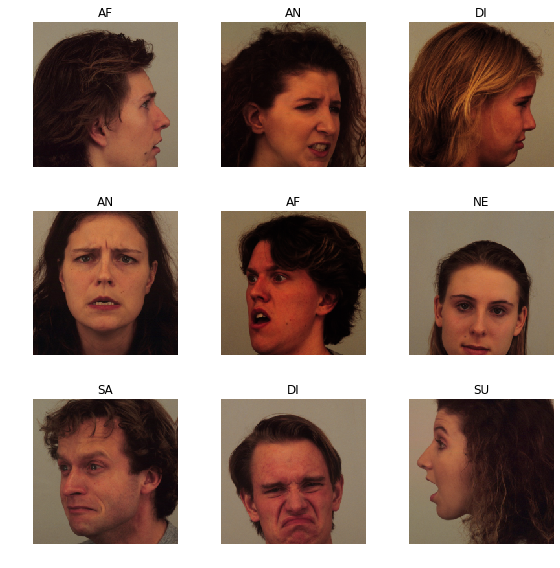

In [34]:
tfms = get_transforms(max_zoom=1, max_warp=None)
data = ImageDataBunch.from_name_re(flat_dir, fnames, pat, ds_tfms=tfms, size=224, bs=16)
data.normalize(imagenet_stats)
data.show_batch(rows=3, figsize=(8,8))

In [35]:
data.classes

['AF', 'AN', 'DI', 'HA', 'NE', 'SA', 'SU']

In [37]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
learn.fit_one_cycle(4)
learn.save("face-1")

Not great: error rate around 27%

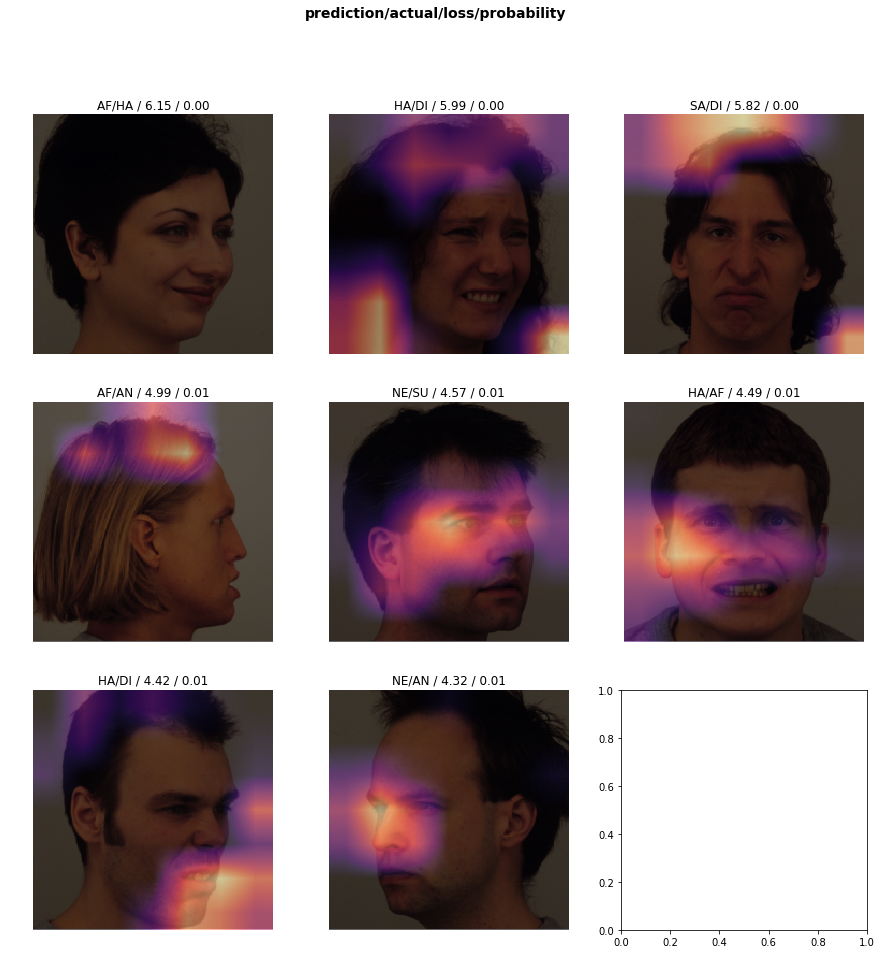

In [38]:
interp = ClassificationInterpretation.from_learner(learn)

interp.plot_top_losses(8, figsize=(15,15))

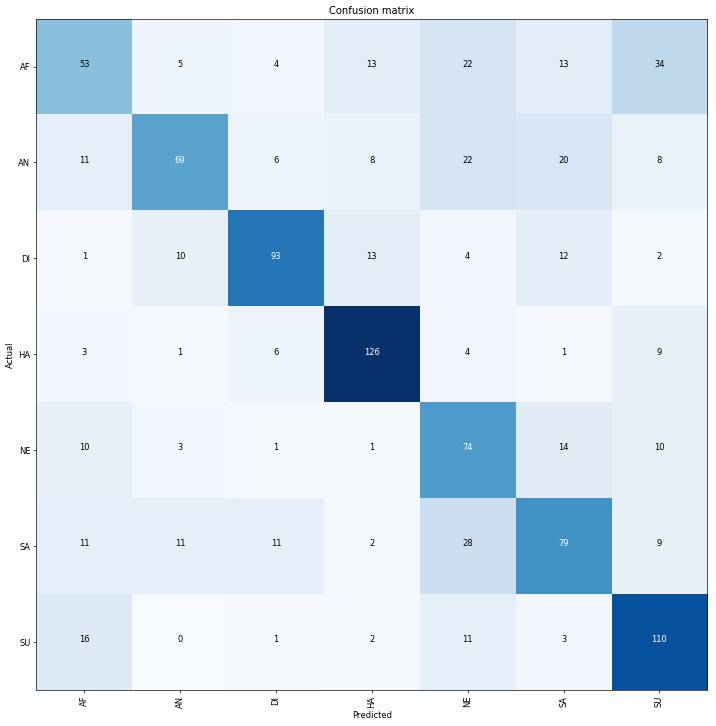

In [39]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [15]:
interp.most_confused(min_val=2)

[('AF', 'SU', 30),
 ('SA', 'NE', 24),
 ('SA', 'AN', 22),
 ('AF', 'NE', 17),
 ('AN', 'NE', 16),
 ('AN', 'DI', 14),
 ('DI', 'SA', 14),
 ('SU', 'AF', 14),
 ('DI', 'AN', 12),
 ('DI', 'HA', 9),
 ('AN', 'SA', 8),
 ('SA', 'DI', 8),
 ('NE', 'SA', 7),
 ('DI', 'AF', 7),
 ('SA', 'AF', 7),
 ('AN', 'AF', 6),
 ('NE', 'AF', 5),
 ('HA', 'AF', 5),
 ('AF', 'SA', 5),
 ('NE', 'SU', 4),
 ('SA', 'SU', 4),
 ('NE', 'AN', 3),
 ('NE', 'DI', 3),
 ('HA', 'NE', 3),
 ('AF', 'HA', 3),
 ('AF', 'AN', 3),
 ('AF', 'DI', 3),
 ('SU', 'NE', 3)]

In [40]:
learn.unfreeze()

In [41]:
learn.fit_one_cycle(1)

In [42]:
learn.load("face-1")

Learner(data=ImageDataBunch;

Train: LabelList (3920 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
NE,AF,NE,SA,SA
Path: /storage/data/KDEF/flat;

Valid: LabelList (980 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
SA,SU,NE,NE,SA
Path: /storage/data/KDEF/flat;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=

In [43]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


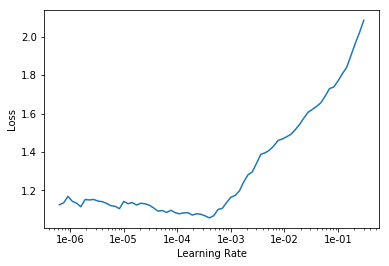

In [44]:
learn.recorder.plot()

In [45]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-5,1e-4))

__Much__ better! Error down to 11%!

In [46]:
learn.save("face-2")

Try with default transforms. This includes a bit of warping, and I'm not sure it's a good idea to include it.

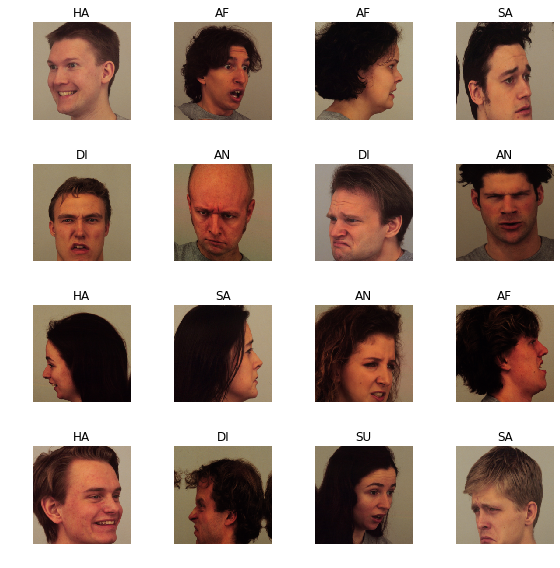

In [47]:
tfms = get_transforms()
data = ImageDataBunch.from_name_re(flat_dir, fnames, pat, ds_tfms=tfms, size=224, bs=16)
data.normalize(imagenet_stats)
data.show_batch(rows=4, figsize=(8,8))

In [49]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
learn.fit_one_cycle(4)

Slightly better than last transform

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


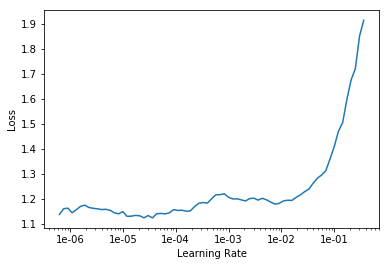

In [50]:
learn.lr_find()
learn.recorder.plot()

In [51]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-5,1e-2))

Try with another set of transforms. This time, include some rotation & zoom, but no warping

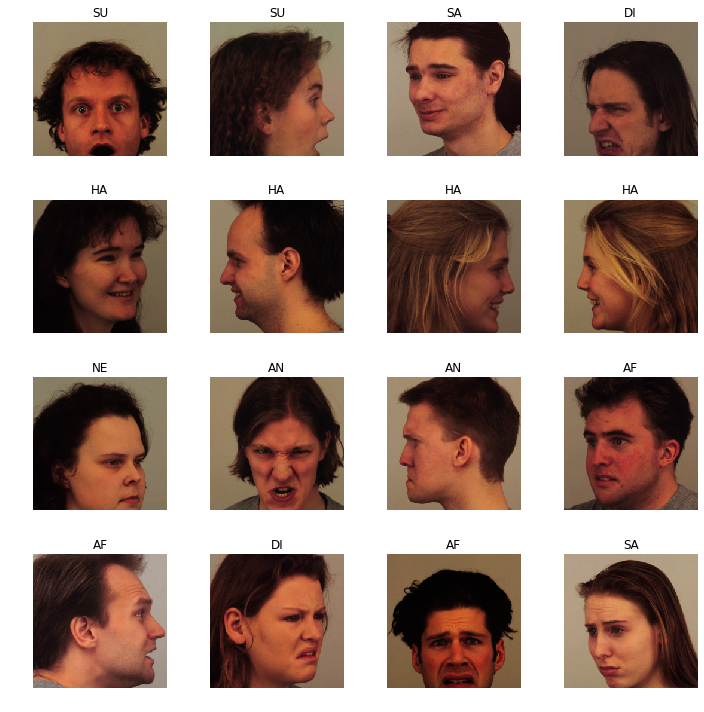

In [52]:
tfms = get_transforms(max_zoom=1.1, max_rotate=5, max_warp=None)
data = ImageDataBunch.from_name_re(flat_dir, fnames, pat, ds_tfms=tfms, size=224, bs=16)
data.normalize(imagenet_stats)
data.show_batch(rows=4, figsize=(10,10))

In [54]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
learn.fit_one_cycle(4)

Best result yet before unfreezing

In [55]:
learn.save("face-3")

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


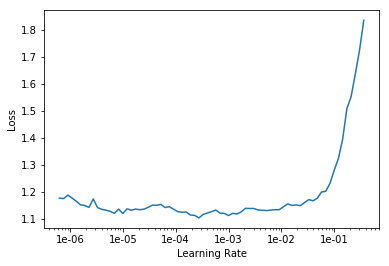

In [56]:
learn.lr_find()
learn.recorder.plot()

In [57]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-5,1e-3))

Slightly better result. But I tried this step multiple times, and each time I found the learning rate graph looked different. Conseuqnetly I tried different values of max_lr, and that had quite a big impact. Using (1e-5, 1e-3) seems to give the best result

### Resnet 50

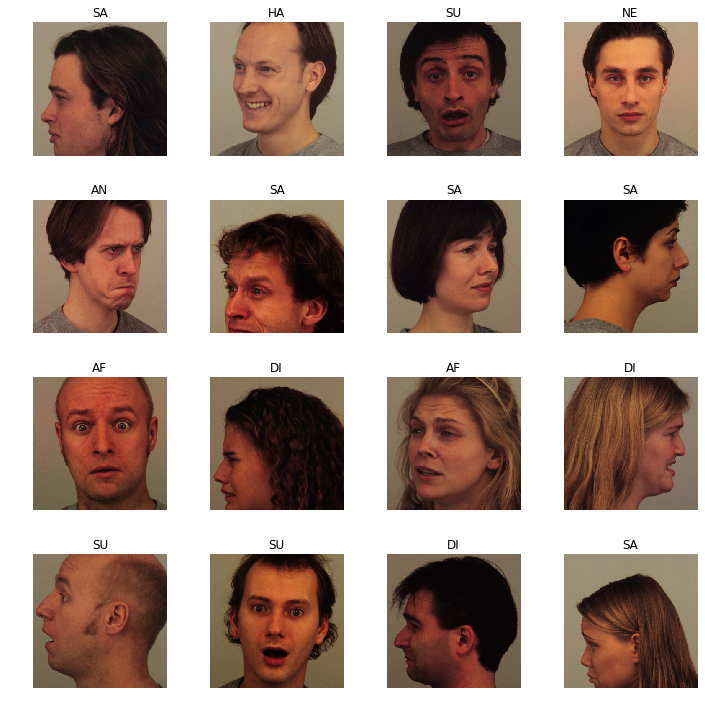

In [58]:
tfms = get_transforms(max_zoom=1.1, max_rotate=5, max_warp=None)
data = ImageDataBunch.from_name_re(flat_dir, fnames, pat, ds_tfms=tfms, size=320, bs=16)
data.normalize(imagenet_stats)
data.show_batch(rows=4, figsize=(10,10))

In [60]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)
learn.fit_one_cycle(7, max_lr=slice(1e-3))
learn.save("face-50-1")

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


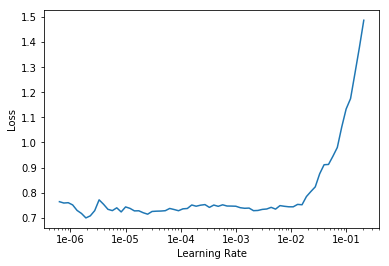

In [61]:
learn.lr_find()
learn.recorder.plot()

In [62]:
learn.unfreeze()
learn.fit_one_cycle(8, max_lr=slice(1e-5,1e-3))

Error rate down to 4%

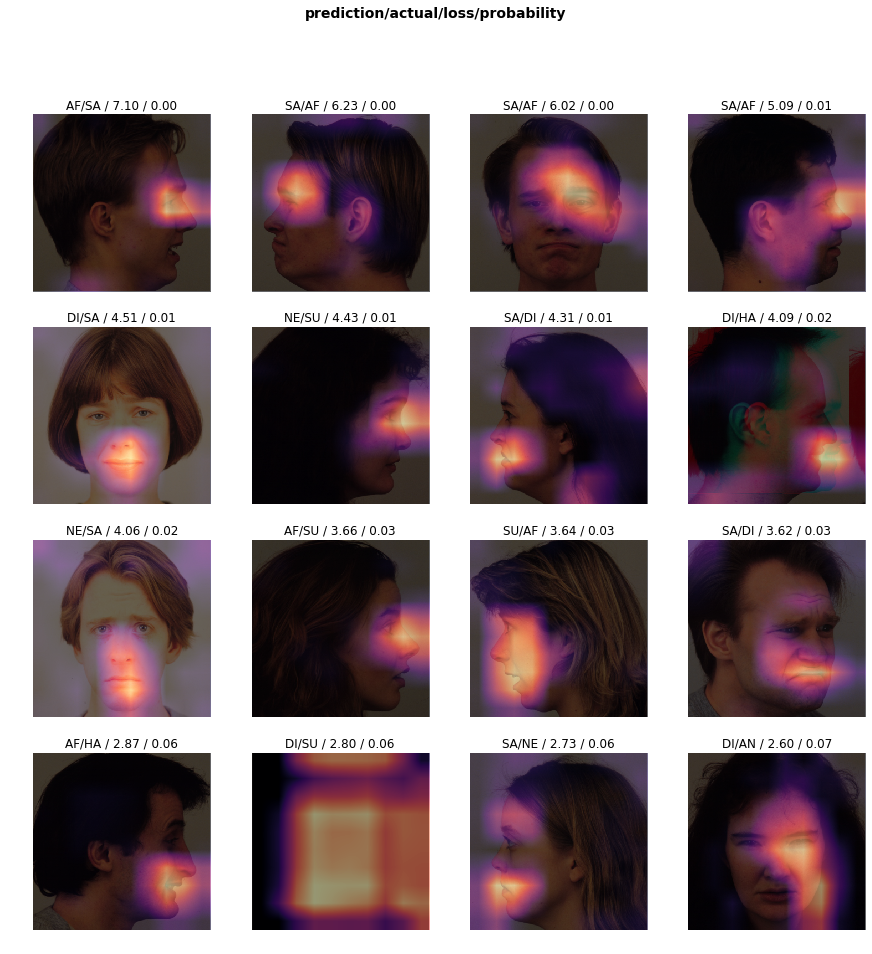

In [63]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(16, figsize=(15,15))

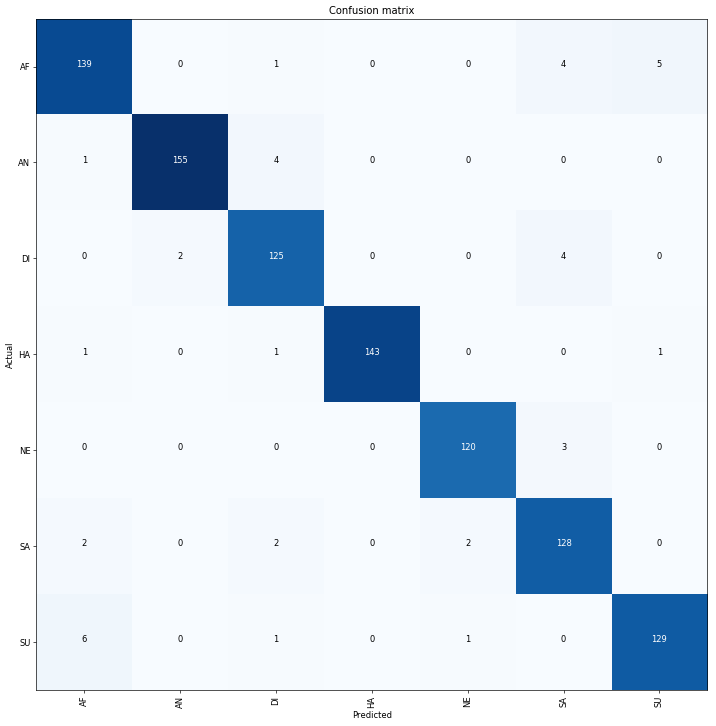

In [64]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

Looking at the confusion matrix, it's interesting to note that the most common mistake is mislabelling fear as surprise. It seems this is a mistake commonly made by humans too:

https://www.ncbi.nlm.nih.gov/pubmed/24460373